In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [3]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [4]:
df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344856,ZWE,Africa,Zimbabwe,2023-09-23,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344857,ZWE,Africa,Zimbabwe,2023-09-24,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344858,ZWE,Africa,Zimbabwe,2023-09-25,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344859,ZWE,Africa,Zimbabwe,2023-09-26,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.069640e+05,3.353380e+05,3.340790e+05,2.855030e+05,335378.000000,334148.000000,306964.000000,335338.000000,334079.000000,285503.000000,...,197841.000000,130960.000000,236037.000000,317238.000000,259170.000000,3.448610e+05,1.194400e+04,11944.000000,11944.000000,11944.000000
mean,6.571274e+06,9.740990e+03,9.777569e+03,8.538039e+04,86.777994,87.093917,100066.612321,147.220899,147.771856,864.828116,...,32.910329,50.789424,3.097260,73.714927,0.722475,1.284284e+08,5.113397e+04,9.738000,11.461947,1644.920249
std,4.013913e+07,1.111088e+05,9.519139e+04,4.371278e+05,618.277391,563.307165,149790.634356,1172.387585,604.285810,1094.986212,...,13.573664,31.955832,2.548358,7.395486,0.148978,6.607026e+08,1.443228e+05,12.384572,25.362370,1927.690984
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,7.910000e+03,0.000000e+00,2.860000e-01,1.250000e+02,0.000000,0.000000,2547.967250,0.000000,0.057000,59.195000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.064000e+02,1.310000,-1.632500,64.913517
50%,6.889000e+04,2.000000e+00,2.600000e+01,1.302000e+03,0.000000,0.143000,27423.887000,0.179000,6.867000,371.780000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.732800e+03,8.060000,5.770000,1071.505500
75%,7.269022e+05,2.760000e+02,5.151430e+02,1.174400e+04,3.000000,5.286000,130428.130000,36.966000,84.638000,1349.452000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.666995e+04,15.470000,16.522500,2701.609900
max,7.708747e+08,8.401961e+06,6.402036e+06,6.959303e+06,27939.000000,14822.000000,737554.506000,228872.025000,37241.781000,6504.190000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.550000,377.630000,10292.916000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,306964.0,6.571274e+06,4.013913e+07,1.0000,7910.000000,6.889000e+04,7.269022e+05,7.708747e+08
new_cases,335338.0,9.740990e+03,1.111088e+05,0.0000,0.000000,2.000000e+00,2.760000e+02,8.401961e+06
new_cases_smoothed,334079.0,9.777569e+03,9.519139e+04,0.0000,0.286000,2.600000e+01,5.151430e+02,6.402036e+06
total_deaths,285503.0,8.538039e+04,4.371278e+05,1.0000,125.000000,1.302000e+03,1.174400e+04,6.959303e+06
new_deaths,335378.0,8.677799e+01,6.182774e+02,0.0000,0.000000,0.000000e+00,3.000000e+00,2.793900e+04
...,...,...,...,...,...,...,...,...
population,344861.0,1.284284e+08,6.607026e+08,47.0000,449002.000000,5.882259e+06,2.830170e+07,7.975105e+09
excess_mortality_cumulative_absolute,11944.0,5.113397e+04,1.443228e+05,-37726.0980,106.400017,5.732800e+03,3.666995e+04,1.289776e+06
excess_mortality_cumulative,11944.0,9.738000e+00,1.238457e+01,-44.2300,1.310000,8.060000e+00,1.547000e+01,7.655000e+01
excess_mortality,11944.0,1.146195e+01,2.536237e+01,-95.9200,-1.632500,5.770000e+00,1.652250e+01,3.776300e+02


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344861 entries, 0 to 344860
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    344861 non-null  object 
 1   continent                                   328453 non-null  object 
 2   location                                    344861 non-null  object 
 3   date                                        344861 non-null  object 
 4   total_cases                                 306964 non-null  float64
 5   new_cases                                   335338 non-null  float64
 6   new_cases_smoothed                          334079 non-null  float64
 7   total_deaths                                285503 non-null  float64
 8   new_deaths                                  335378 non-null  float64
 9   new_deaths_smoothed                         334148 non-null  float64
 

In [9]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
df['location']

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
344856       Zimbabwe
344857       Zimbabwe
344858       Zimbabwe
344859       Zimbabwe
344860       Zimbabwe
Name: location, Length: 344861, dtype: object

In [11]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [12]:
df_Senegal = df[df.location == 'Senegal']
df_Senegal

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
271366,SEN,Africa,Senegal,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
271367,SEN,Africa,Senegal,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
271368,SEN,Africa,Senegal,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
271369,SEN,Africa,Senegal,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
271370,SEN,Africa,Senegal,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272725,SEN,Africa,Senegal,2023-09-23,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
272726,SEN,Africa,Senegal,2023-09-24,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
272727,SEN,Africa,Senegal,2023-09-25,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
272728,SEN,Africa,Senegal,2023-09-26,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN


In [13]:
df_Senegal.reset_index(drop = True , inplace = True)
df_Senegal

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,SEN,Africa,Senegal,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1,SEN,Africa,Senegal,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
2,SEN,Africa,Senegal,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
3,SEN,Africa,Senegal,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
4,SEN,Africa,Senegal,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,SEN,Africa,Senegal,2023-09-23,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1360,SEN,Africa,Senegal,2023-09-24,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1361,SEN,Africa,Senegal,2023-09-25,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1362,SEN,Africa,Senegal,2023-09-26,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN


In [14]:
df_Senegal.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,SEN,Africa,Senegal,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1,SEN,Africa,Senegal,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
2,SEN,Africa,Senegal,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
3,SEN,Africa,Senegal,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
4,SEN,Africa,Senegal,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN


In [15]:
df_Senegal.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1359,SEN,Africa,Senegal,2023-09-23,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1360,SEN,Africa,Senegal,2023-09-24,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1361,SEN,Africa,Senegal,2023-09-25,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1362,SEN,Africa,Senegal,2023-09-26,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN
1363,SEN,Africa,Senegal,2023-09-27,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN


In [16]:
df_Senegal.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1305.000000,1364.000000,1359.000000,1178.000000,1364.000000,1359.000000,1305.000000,1364.000000,1359.000000,1178.000000,...,1.364000e+03,1.364000e+03,0.0,1.364000e+03,1.364000e+03,1364.0,0.0,0.0,0.0,0.0
mean,59432.419923,65.265396,65.505525,1513.534805,1.445015,1.450358,3432.136089,3.768922,3.782782,87.404352,...,1.660000e+01,2.085900e+01,NaN,6.794000e+01,5.120000e-01,17316452.0,NaN,NaN,NaN,NaN
std,33207.124576,143.919446,134.422659,643.272568,4.857687,3.196328,1917.663293,8.311169,7.762737,37.147980,...,2.203490e-13,3.127535e-13,NaN,1.307878e-12,1.477138e-14,0.0,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,137.000000,0.000000,0.000000,0.058000,0.000000,0.000000,7.912000,...,1.660000e+01,2.085900e+01,NaN,6.794000e+01,5.120000e-01,17316452.0,NaN,NaN,NaN,NaN
25%,23910.000000,0.000000,1.571000,1104.500000,0.000000,0.000000,1380.768000,0.000000,0.091000,63.783000,...,1.660000e+01,2.085900e+01,NaN,6.794000e+01,5.120000e-01,17316452.0,NaN,NaN,NaN,NaN
50%,74092.000000,11.000000,11.429000,1957.000000,0.000000,0.000000,4278.706000,0.635000,0.660000,113.014000,...,1.660000e+01,2.085900e+01,NaN,6.794000e+01,5.120000e-01,17316452.0,NaN,NaN,NaN,NaN
75%,88817.000000,66.000000,73.714500,1968.000000,1.000000,1.143000,5129.053000,3.811000,4.256500,113.649000,...,1.660000e+01,2.085900e+01,NaN,6.794000e+01,5.120000e-01,17316452.0,NaN,NaN,NaN,NaN
max,89022.000000,1722.000000,979.000000,1971.000000,137.000000,21.429000,5140.891000,99.443000,56.536000,113.822000,...,1.660000e+01,2.085900e+01,NaN,6.794000e+01,5.120000e-01,17316452.0,NaN,NaN,NaN,NaN


In [17]:
df_Senegal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1364 non-null   object 
 1   continent                                   1364 non-null   object 
 2   location                                    1364 non-null   object 
 3   date                                        1364 non-null   object 
 4   total_cases                                 1305 non-null   float64
 5   new_cases                                   1364 non-null   float64
 6   new_cases_smoothed                          1359 non-null   float64
 7   total_deaths                                1178 non-null   float64
 8   new_deaths                                  1364 non-null   float64
 9   new_deaths_smoothed                         1359 non-null   float64
 10  total_cases_

In [18]:
df_Senegal['new_deaths'].mean()

1.4450146627565983

In [26]:
df_Senegal['total_cases'].mean()

59432.41992337165

In [19]:
df_Senegal_recent = df_Senegal[df_Senegal['date'] == df_Senegal.date.max()]
df_Senegal_recent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1363,SEN,Africa,Senegal,2023-09-27,89022.0,0.0,0.0,1971.0,0.0,0.0,...,16.6,20.859,NaN,67.94,0.512,17316452.0,NaN,NaN,NaN,NaN


In [20]:
df_Senegal[['total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]].max()

total_cases     89022.0
new_cases        1722.0
total_deaths     1971.0
new_deaths        137.0
dtype: float64

In [21]:
df_Senegal.loc[df_Senegal['new_deaths'].idxmax()]['date']

'2020-07-07'

In [22]:
df_Senegal_over_time = df_Senegal.groupby(["date"])[["total_cases","new_cases","total_deaths","new_deaths"]].sum().reset_index()
df_Senegal_over_time

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-03,0.0,0.0,0.0,0.0
1,2020-01-04,0.0,0.0,0.0,0.0
2,2020-01-05,0.0,0.0,0.0,0.0
3,2020-01-06,0.0,0.0,0.0,0.0
4,2020-01-07,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1359,2023-09-23,89022.0,0.0,1971.0,0.0
1360,2023-09-24,89022.0,0.0,1971.0,0.0
1361,2023-09-25,89022.0,0.0,1971.0,0.0
1362,2023-09-26,89022.0,0.0,1971.0,0.0


C:\Users\El 3alamia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


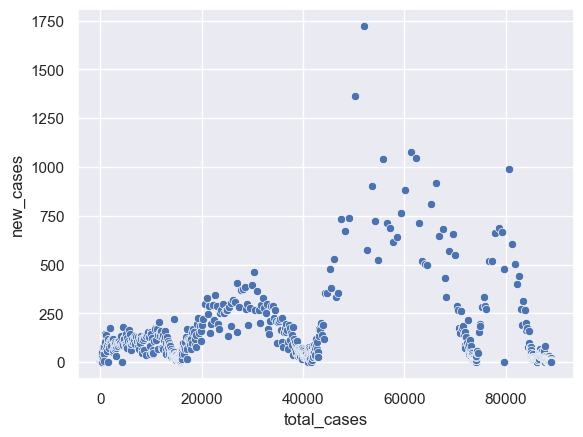

In [23]:
sns.scatterplot('total_cases', 'new_cases', data=df_Senegal)
plt.show()

C:\Users\El 3alamia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


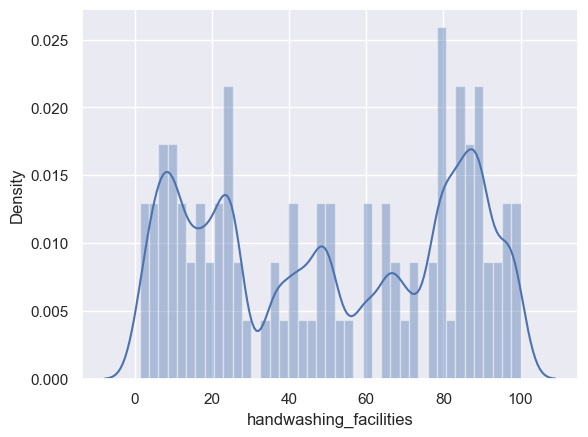

In [24]:
sns.distplot(df['handwashing_facilities'])
plt.show()